# Demo: Normal Distribution of Stock Ticker Data

This program retrieves stock price data using the Alpaca API and plots the data using Pandas. These plots demonstrate the distribution of daily stock closing prices compared to the expected normal probability distribution. 

## Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Get 1 Year's Worth of Stock Price Data via Alpaca API Call and Read in as DataFrame 

In [3]:
# Set the IBM and Amazon tickers
ticker = ["IBM","AMZN"]

# Set timeframe to '1Day'
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for IBM and Amazon
df_ticker = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
IBM = df_ticker[df_ticker['symbol']=='IBM'].drop('symbol', axis=1)
AMZN = df_ticker[df_ticker['symbol']=='AMZN'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([IBM, AMZN], axis=1, keys=["IBM","AMZN"])

# Display sample data
df_ticker.head(10)

IBM                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-05-01 04:00:00+00:00  140.55  141.8100  140.17  140.56  3053683   
2019-05-02 04:00:00+00:00  140.50  141.2800  139.41  139.59  3541352   
2019-05-03 04:00:00+00:00  139.70  141.0000  139.63  140.25  2580145   
2019-05-06 04:00:00+00:00  138.30  140.6900  137.90  140.38  2793695   
2019-05-07 04:00:00+00:00  139.13  139.5100  136.19  137.64  4728906   
2019-05-08 04:00:00+00:00  137.77  138.7000  137.13  138.00  3820322   
2019-05-09 04:00:00+00:00  135.00  135.5848  133.03  135.34  4192942   
2019-05-10 04:00:00+00:00  134.88  135.7500  132.42  135.32  3979543   
2019-05-13 04:00:00+00:00  133.16  133.5700  130.96  131.42  4958021   
2019-05-14 04:00:00+00:00  131.82  134.3200  131.68  133.31  3280374   

                                                      AMZN             \
                          trade_count        vwap     open       high   
timestamp                                                               
2019-05-01 04:00:00+00:00       28354  140.988218  1933.05  1943.6400   
2019-05-02 04:00:00+00:00       32724  139.986873  1913.33  1921.5500   
2019-05-03 04:00:00+00:00       22436  140.362880  1949.00  1964.4000   
2019-05-06 04:00:00+00:00       27081  139.586727  1917.12  1959.0000   
2019-05-07 04:00:00+00:00       47377  137.529690  1940.40  1949.1005   
2019-05-08 04:00:00+00:00       33722  138.095558  1920.00  1935.3700   
2019-05-09 04:00:00+00:00       38300  134.639009  1900.00  1909.4000   
2019-05-10 04:00:00+00:00       44923  134.325453  1899.38  1903.7900   
2019-05-13 04:00:00+00:00       45150  131.806061  1836.00  1846.5350   
2019-05-14 04:00:00+00:00       32166  133.464910  1839.50  1852.4400   

                                                                    \
                                 low    close   volume trade_count   
timestamp                                                            
2019-05-01 04:00:00+00:00  1910.5500  1911.52  3118195       82770   
2019-05-02 04:00:00+00:00  1881.8700  1900.82  3962915      112010   
2019-05-03 04:00:00+00:00  1936.0000  1962.46  6381584      172761   
2019-05-06 04:00:00+00:00  1910.5000  1950.55  5417881      132143   
2019-05-07 04:00:00+00:00  1903.3795  1921.00  5902141      155481   
2019-05-08 04:00:00+00:00  1910.0000  1917.77  4077784      103251   
2019-05-09 04:00:00+00:00  1876.0000  1899.87  5308293      150206   
2019-05-10 04:00:00+00:00  1856.0000  1889.98  5718855      166257   
2019-05-13 04:00:00+00:00  1818.0000  1822.68  5783429      157892   
2019-05-14 04:00:00+00:00  1815.7500  1840.12  4629107      122706   

                                        
                                  vwap  
timestamp                               
2019-05-01 04:00:00+00:00  1931.519615  
2019-05-02 04:00:00+00:00  1899.801325  
2019-05-03 04:00:00+00:00  1955.699963  
2019-05-06 04:00:00+00:00  1941.409620  
2019-05-07 04:00:00+00:00  1921.746551  
2019-05-08 04:00:00+00:00  1924.462444  
2019-05-09 04:00:00+00:00  1893.646124  
2019-05-10 04:00:00+00:00  1880.000018  
2019-05-13 04:00:00+00:00  1829.272737  
2019-05-14 04:00:00+00:00  1839.323835

## Pick closing prices and compute the daily returns

In [4]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AMZN and IBM
df_closing_prices["AMZN"] = df_ticker["AMZN"]["close"]
df_closing_prices["IBM"] = df_ticker["IBM"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,AMZN,IBM
2019-05-02,-0.005598,-0.006901
2019-05-03,0.032428,0.004728
2019-05-06,-0.006069,0.000927
2019-05-07,-0.015150,-0.019518
2019-05-08,-0.001681,0.002616
2019-05-09,-0.009334,-0.019275
2019-05-10,-0.005206,-0.000148
2019-05-13,-0.035609,-0.028821
2019-05-14,0.009568,0.014381
2019-05-15,0.016863,0.008176


In [5]:
# Generate descriptive statistics
df_daily_returns.describe()

,AMZN,IBM
count,253.000000,253.000000
mean,0.000906,-0.000287
std,0.019956,0.023509
min,-0.079221,-0.128507
25%,-0.008099,-0.008283
50%,0.000850,0.000671
75%,0.009123,0.009322
max,0.073791,0.113010


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

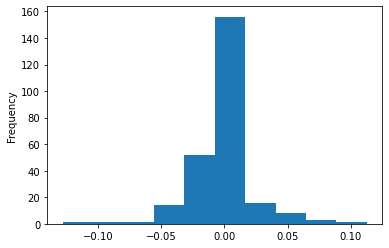

In [6]:
# Visualize distribution of IBM percent change in closing price using a histogram plot
df_daily_returns["IBM"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

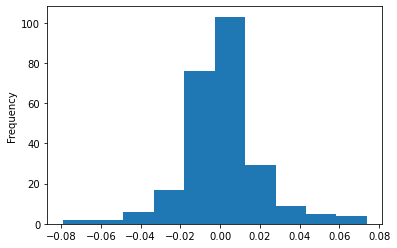

In [7]:
# Visualize distribution of Amazon percent change in closing price using a histogram plot
df_daily_returns["AMZN"].plot.hist()

<AxesSubplot:ylabel='Density'>

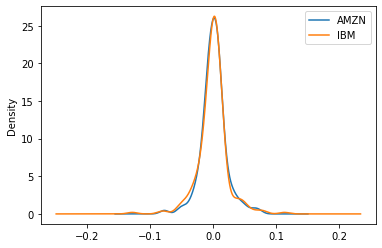

In [8]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
df_daily_returns.plot.density()